In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
#importing our cleaned data
df = pd.read_csv(r"C:\Users\arubi\Desktop\datascience2025\erdos-uncreatives\raw_data_read_only\clean_data2.csv")

In [157]:
print(df.columns) #Investigating which columns remain after cleaning 

Index(['channelDescription', 'channelJoinedDate', 'channelLocation',
       'channelTotalVideos', 'channelTotalViews', 'channelUsername',
       'commentsCount', 'date', 'duration', 'id', 'isChannelVerified', 'likes',
       'numberOfSubscribers', 'order', 'text', 'title', 'url', 'viewCount'],
      dtype='object')


In [158]:
df.info()

df["text"].sample(10)
#THIS IS THE "DESCRIPTION" OF THE VIDEO. MANY USERS LEAVE THE DESCRIPTION BLANK!!! 

#We want this. 
#I am changing the NaN entries to empty strings. 

text_list = []

for item in df["text"]:
    x = item if type(item) == str else '' 
    text_list.append(x)

df["text"] = np.array(text_list)
df["text"].sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19185 entries, 0 to 19184
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   channelDescription   18151 non-null  object 
 1   channelJoinedDate    19185 non-null  object 
 2   channelLocation      13922 non-null  object 
 3   channelTotalVideos   19185 non-null  float64
 4   channelTotalViews    19185 non-null  float64
 5   channelUsername      19185 non-null  object 
 6   commentsCount        19163 non-null  float64
 7   date                 19184 non-null  object 
 8   duration             18818 non-null  object 
 9   id                   19185 non-null  object 
 10  isChannelVerified    19185 non-null  bool   
 11  likes                19167 non-null  float64
 12  numberOfSubscribers  19185 non-null  float64
 13  order                19185 non-null  float64
 14  text                 5657 non-null   object 
 15  title                19185 non-null 

122                                                       
10713                                                     
1963     Valentino Go-Cushion Foundation in Pink #valen...
18820                                                     
7981                                                      
18025                                                     
4883                                                      
18958    Products: numbuzin no.5+ serum and toner\r\n*T...
17696                                                     
3544                                                      
Name: text, dtype: object

In [159]:
#Double-checking for non-null entries
#Let's drop Channel Location since that one is also often empty

df2 = df.drop("channelLocation", axis = 1) 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19185 entries, 0 to 19184
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   channelDescription   18151 non-null  object 
 1   channelJoinedDate    19185 non-null  object 
 2   channelTotalVideos   19185 non-null  float64
 3   channelTotalViews    19185 non-null  float64
 4   channelUsername      19185 non-null  object 
 5   commentsCount        19163 non-null  float64
 6   date                 19184 non-null  object 
 7   duration             18818 non-null  object 
 8   id                   19185 non-null  object 
 9   isChannelVerified    19185 non-null  bool   
 10  likes                19167 non-null  float64
 11  numberOfSubscribers  19185 non-null  float64
 12  order                19185 non-null  float64
 13  text                 19185 non-null  object 
 14  title                19185 non-null  object 
 15  url                  19185 non-null 

In [160]:
#Okay, now I see that some columns still have empty entries. Let's drop them. 

df2 = df2.dropna().copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17776 entries, 0 to 19184
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   channelDescription   17776 non-null  object 
 1   channelJoinedDate    17776 non-null  object 
 2   channelTotalVideos   17776 non-null  float64
 3   channelTotalViews    17776 non-null  float64
 4   channelUsername      17776 non-null  object 
 5   commentsCount        17776 non-null  float64
 6   date                 17776 non-null  object 
 7   duration             17776 non-null  object 
 8   id                   17776 non-null  object 
 9   isChannelVerified    17776 non-null  bool   
 10  likes                17776 non-null  float64
 11  numberOfSubscribers  17776 non-null  float64
 12  order                17776 non-null  float64
 13  text                 17776 non-null  object 
 14  title                17776 non-null  object 
 15  url                  17776 non-null  obje

In [161]:
#We are interested in engagement metrics. Obviously the more subscribers you have, the more views/likes/comments you will get. A post is performing well
#regardless of follower count if it has good "engagement", which is a metrics such as likes/subscriber. Here I am transforming raw likes/comments/views
#to engagement metrics. 

df2["likes per subscriber"] = df["likes"]/df["numberOfSubscribers"]
df2["comments per subscriber"] = df["commentsCount"]/df["numberOfSubscribers"]
df2["views per subscriber"] = df["viewCount"]/df["numberOfSubscribers"]

In [162]:
#Changing duration column from a string to an integer 
import datetime 

list_of_durations = []

for item in df2["duration"]:
    item_as_datetime = datetime.datetime.strptime( item , "%H:%M:%S"  ) #converts string to a datetime object
    a_timedelta = item_as_datetime - datetime.datetime(1900, 1, 1) #timedelta object, so that I can use the total_seconds() method in the next step
    seconds = a_timedelta.total_seconds()
    list_of_durations.append(seconds) 
    
array_of_durations = np.array(list_of_durations) 

df2["duration in seconds"] = array_of_durations 
df2["duration in seconds"].sample(10) #Can confirm that column is correct now 

7330      59.0
11916     25.0
3784      13.0
12075    111.0
1697      16.0
7020      55.0
18887     36.0
14457     37.0
3232      41.0
10140     47.0
Name: duration in seconds, dtype: float64

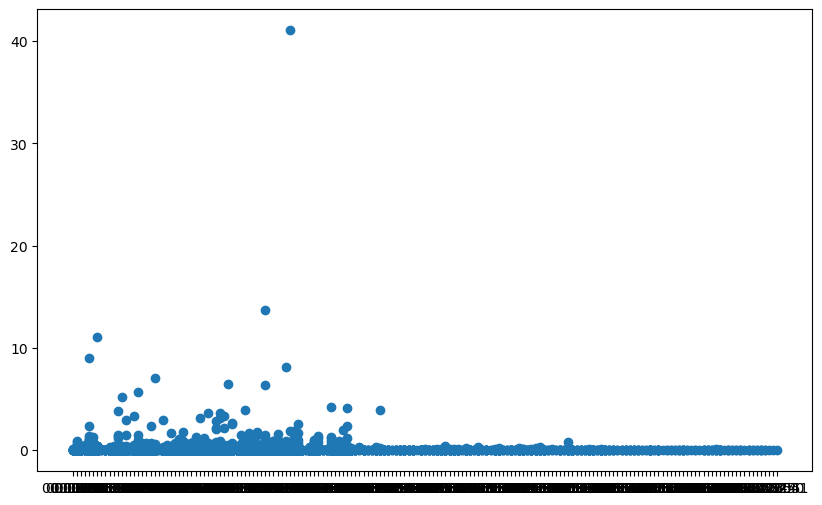

In [163]:
plt.figure(figsize = (10,6))

x = df2["duration"]
y = df2["likes per subscriber"]

plt.scatter(x,y)

plt.show()

#This plot does nothing other than to let us know to change our scale. Also I am pretty sure that the "outliers" are a couple videos that went super viral

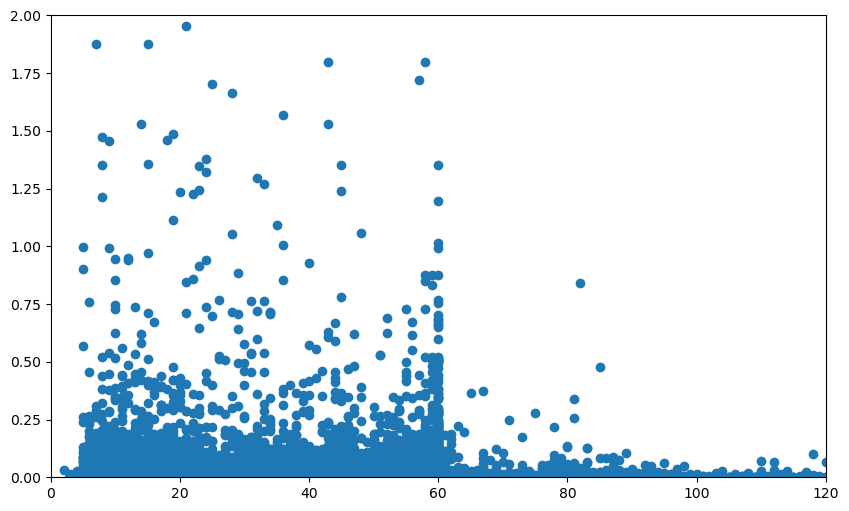

In [164]:
plt.figure(figsize = (10,6))

x = df2["duration in seconds"]
y = df2["likes per subscriber"]

plt.scatter(x,y)

plt.xlim(0,120)
plt.ylim(0,2)


plt.show()

#It looks like shorter videos do well, BUT we must remember: Video lengths of longer than 60 seconds were only introduced on October 15 of 2024.
#So the second half of the graph, videos that take longer than 60 seconds, is improperly populated. 
#So we want to look only at those videos posted before October 15, or after October 15, but not both 

In [165]:
#Okay, let's restrict our attention to those rows that came after October 15th.
#At the same time, we should change our data so that none of the data comes after 3/1. This is the date we first started collecting
#and after that date, data was scraped over the first few days. 

#Okay, time to continue to clean by removing data after 3/1
#First, we need to change the date column so that it is a datetime object and not a string
datetime_list = []
for item in df2["date"]:
    datetime_item = datetime.datetime.fromisoformat(item)
    datetime_list.append (datetime_item) 

df2["datetime date"] = np.array(datetime_list)
df2["datetime date"]

0       2025-01-01 17:03:25+00:00
1       2024-09-26 17:09:34+00:00
2       2024-12-13 17:06:39+00:00
3       2025-02-16 18:19:19+00:00
4       2024-07-07 17:33:45+00:00
                   ...           
19179   2024-02-04 18:05:27+00:00
19181   2024-02-07 23:43:52+00:00
19182   2024-01-19 21:42:11+00:00
19183   2024-01-12 18:05:26+00:00
19184   2024-01-24 18:38:35+00:00
Name: datetime date, Length: 17776, dtype: datetime64[ns, UTC]

In [166]:
march_1_2025_str = '2025-03-01T00:00:00.000Z'
march_1_2025 = datetime.datetime.fromisoformat(march_1_2025_str) #This is an "aware" datetime object in the same format as the others 

oct_15_2024_str = '2024-10-15T00:00:00.000Z'
oct_15_2024 = datetime.datetime.fromisoformat(oct_15_2024_str) #This is an "aware" datetime object in the same format as the others 

In [167]:
#Okay, now we look at the data before 3/1

df2 = df2.reset_index(drop=True) #Resetting the indexing of the rows to default 
df3 = df2.loc[ df2["datetime date"] < march_1_2025 ]

df3.to_csv("cleaner_transformed_data_Rachael.csv")

#Okay, now we split the data

df_before = df3.loc[ df3["datetime date"] < oct_15_2024 ] 
df_after = df3.loc[ df3["datetime date"] > oct_15_2024 ] 

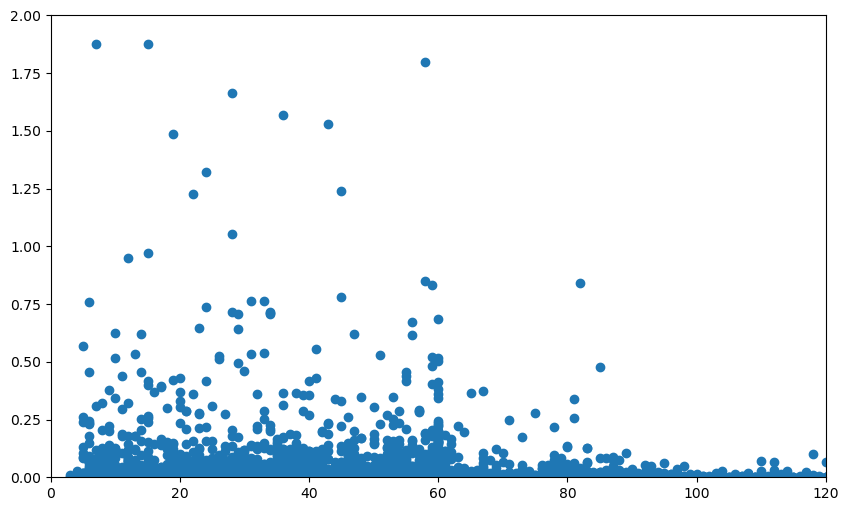

In [168]:
#Let's redo the scatter plot

plt.figure(figsize = (10,6))

x = df_after["duration in seconds"]
y = df_after["likes per subscriber"]

plt.scatter(x,y)

plt.xlim(0,120)
plt.ylim(0,2)

plt.show()

#I definitely see that videos that are longer in length seemm to be less viral. I also see a drop-off after 60 seconds, just like before, except now
#we can CONFIRM that this drop-off is not due to the under-population of data UNLESS most people simply still choose to create videos that are less than 
#60 seconds long

#What we need to compare is the MEAN of videos under 60 seconds to the MEAN of videos over 60 seconds 

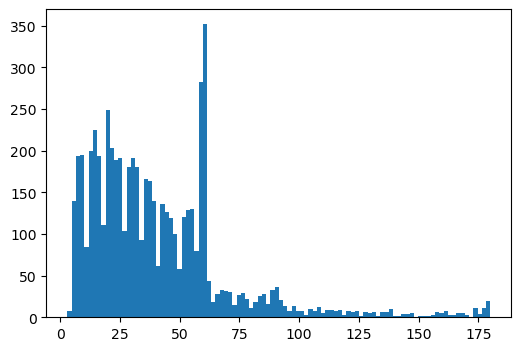

In [169]:
#First let's confirm distribution is heavily skewed toward under 60 seconds even after
#looking only at data that comes after october 15

plt.figure(figsize = (6,4)) 

plt.hist( x = df_after["duration in seconds"], bins = 100)

plt.show()

#As we can see, most videos are under 60 seconds, with a HUGE number of them being almost exactly 60 seconds

In [170]:
#Creating an indicator variable so that we can see two violin plots based on length

df_after = df_after.copy() #Makes this its own thing instead of a view object from our previous dataframe

duration_ind_list = []

for item in df_after["duration in seconds"]:
    x = "<60s" if item < 60 else ">60s" 
    duration_ind_list.append(x)

dur_ind_arr = np.array( duration_ind_list)

df_after["duration ind"] = dur_ind_arr

df_after["duration ind"]

0        >60s
2        >60s
3        >60s
5        <60s
9        <60s
         ... 
17667    >60s
17668    <60s
17669    <60s
17670    <60s
17671    <60s
Name: duration ind, Length: 5852, dtype: object

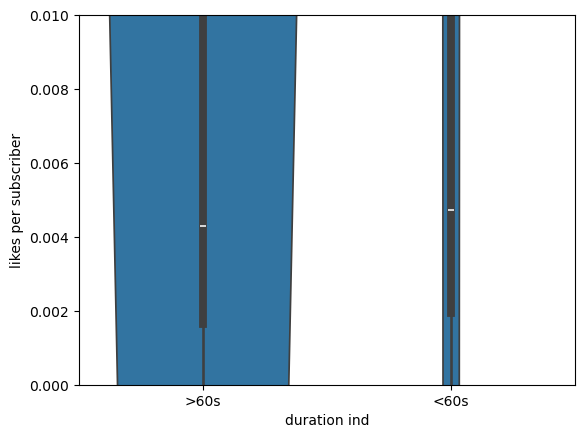

In [171]:
sns.violinplot( data = df_after, y = "likes per subscriber", x = "duration ind")
plt.ylim(0,.01)
plt.show()

#This is an exceptionally shitty graph but you can see that the mean of the "short" videos is slightly higher. 

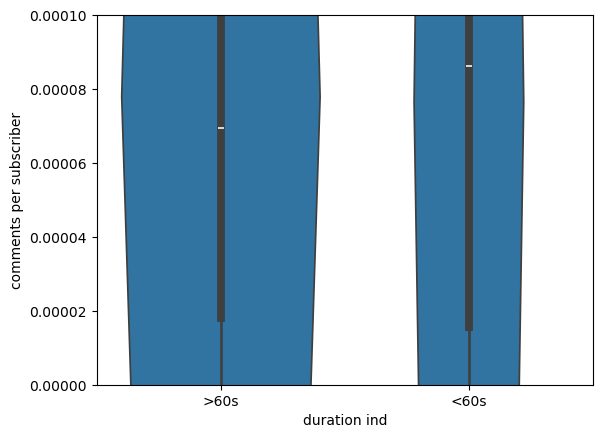

In [172]:
sns.violinplot( data = df_after, y = "comments per subscriber", x = "duration ind")
plt.ylim(0,.0001)
plt.show()

#This is an exceptionally shitty graph but you can see that the mean of the "short" videos is again slightly higher. 

#These graphs are so bad that we should just do t-test with these two groups and their means instead. 
#But we have some preliminary analysis that suggests shorter videos do better. 

In [173]:
#Often, influencers are encouraged to include hashtags to reach their audience. 
#However, some people say that hashtags are viewed as "spammy". 
#We will create an indicator variable that tests whether a hashtag appears in a video's title.
#Note that there is no such thing as a description separate from the title in our current dataframe

df3 = df3.copy()

ht_list = []
for item in df3["title"]:
    x = "yes#" if ("#" in item) else "no#"
    ht_list.append(x)
    
df3["hashtag indicator"] = np.array(ht_list) 

df3_yes = df3.loc[ df3["hashtag indicator"] == "yes#" ]
df3_no = df3.loc[ df3["hashtag indicator"] == "no#" ]

print(df3_yes["views per subscriber"].mean())
print(df3_no["views per subscriber"].mean())
print(df3["views per subscriber"].mean())

#As you can see, including hashtags in the title significantly improves views! We should do a t-test here, and compare to 
#hashtags in title alone vs hashtags in both title and description vs hashtags in description alone 

1.204154806179877
0.5337668582725518
0.8889133077858782


In [174]:
print(df3_yes["viewCount"].mean())
print(df3_no["viewCount"].mean())
#But it also seems like people who already get lots of views don't bother with hastags. 

244776.14259676207
507563.9576035753


In [175]:
#Another question: Among people who use already hashtags, are general hashtags better or specific hashtags? 
#The two most general hashtags for our niche are #makeup and #skincare. 

#Let's create another indicator variable and look at the means

df3_yes = df3_yes.copy()

ght_list = []
for item in df3_yes["title"]:
    x = "yesg#" if ("#makeup" in item or "#skincare" in item) else "nog#"
    ght_list.append(x)
    
df3_yes["generic hashtag indicator"] = np.array(ght_list) 

df3_yesg = df3_yes.loc[ df3_yes["generic hashtag indicator"] == "yesg#" ]
df3_nog = df3_yes.loc[ df3_yes["generic hashtag indicator"] == "nog#" ]

print(df3_yesg["views per subscriber"].mean())
print(df3_nog["views per subscriber"].mean())
print(df3_yes["views per subscriber"].mean())

df3_yesg.shape
#Okay, we see that generic hashtags put you below the mean and that not including generic hashtags put you above the mean 
#So maybe that means only using specific hashtags are better. 
#More analysis can be done here
#Also please notice that plenty of people do use generic hashtags!! 

1.0732233048476425
1.3215352432221346
1.204154806179877


(4409, 24)

In [176]:
#Does including hashtags also increase likes?

print(df3_yes["likes per subscriber"].mean())
print(df3_no["likes per subscriber"].mean())
print(df3["likes per subscriber"].mean())

#Yes they do 

0.04937932826008808
0.02391022602448664
0.03740280335900071


In [177]:
df3.columns

Index(['channelDescription', 'channelJoinedDate', 'channelTotalVideos',
       'channelTotalViews', 'channelUsername', 'commentsCount', 'date',
       'duration', 'id', 'isChannelVerified', 'likes', 'numberOfSubscribers',
       'order', 'text', 'title', 'url', 'viewCount', 'likes per subscriber',
       'comments per subscriber', 'views per subscriber',
       'duration in seconds', 'datetime date', 'hashtag indicator'],
      dtype='object')

In [178]:
#Checking if the influencer includes a "call to action" that specifically asks users to comment

c_list = []
for item in df3["title"]:
    x = "yesc" if ("comment" in item) else "noc"
    c_list.append(x)
    
df3["comment call indicator"] = np.array(c_list) 

df3_yesc = df3.loc[ df3["comment call indicator"] == "yesc" ]
df3_noc = df3.loc[ df3["comment call indicator"] == "noc" ]

print("If you ask for comments, your mean comment engagement is: \n", df3_yesc["comments per subscriber"].mean())
print("If you do not ask for comments, your mean comment engagement is: \n", df3_noc["comments per subscriber"].mean())
print("Overall mean comment engagement is: \n", df3["comments per subscriber"].mean())

print("If you ask for comments, your mean view engagement is: \n", df3_yesc["views per subscriber"].mean())
print("If you do not ask for comments, your mean view engagement is: \n", df3_noc["views per subscriber"].mean())
print("Overall mean view engagement is: \n", df3["views per subscriber"].mean())

print(df3_yesc["likes per subscriber"].mean())
print(df3_noc["likes per subscriber"].mean())
print(df3["likes per subscriber"].mean())

df3_yesc.shape
#So asking for comments does appear to significantly improve the number of comments 
#But not the number of views or the number of likes
#And very few people ask for comments, so it's unclear if this analysis was worthwhile. 

If you ask for comments, your mean comment engagement is: 
 0.001099426118257928
If you do not ask for comments, your mean comment engagement is: 
 0.0004755222793705086
Overall mean comment engagement is: 
 0.000477329566419427
If you ask for comments, your mean view engagement is: 
 0.7108267874429472
If you do not ask for comments, your mean view engagement is: 
 0.8894306767712091
Overall mean view engagement is: 
 0.8889133077858782
0.03572682042682564
0.037407672349575524
0.03740280335900071


(51, 24)

In [179]:
#Checking if engagement is higher if a popular brand like Natasha Denona is mentioned 

nd_list = []
for item in df3["title"]:
    item = item.lower()
    x = "yesnd" if ("natasha denona" in item) else "nond"
    nd_list.append(x)
    
df3["ND ind"] = np.array(nd_list) 

df3_yesnd = df3.loc[ df3["ND ind"] == "yesnd" ]
df3_nond = df3.loc[ df3["ND ind"] == "nond" ]

print(df3_yesnd["likes per subscriber"].mean())
print(df3_nond["likes per subscriber"].mean())
print(df3["likes per subscriber"].mean())

df3_yesnd.shape

#This analysis sucked since so few people mention Natasha Denona. 

0.005210739352159444
0.03750552447491997
0.03740280335900071


(56, 25)

In [180]:
#Checking if engagement is higher if a popular brand like drunk elephant is mentioned 

de_list = []
for item in df3["title"]:
    item = item.lower()
    x = "yesde" if ("drunk elephant" in item) else "node"
    de_list.append(x)
    
df3["DE ind"] = np.array(de_list) 

df3_yesde = df3.loc[ df3["DE ind"] == "yesde" ]
df3_node = df3.loc[ df3["DE ind"] == "node" ]

print(df3_yesde["likes per subscriber"].mean())
print(df3_node["likes per subscriber"].mean())
print(df3["likes per subscriber"].mean())

df3_yesde.shape

#This analysis sucked since so few people mention drunk elephant

0.012120374905413452
0.03742580045139738
0.03740280335900071


(16, 26)

In [181]:
#Checking if posts that have a description do better on average

df3_nodesc = df3.loc[ df3["text"] == '']
df3_yesdesc = df3.loc[ df3["text"] != '' ]

print(df3_yesdesc["views per subscriber"].mean())
print(df3_nodesc["views per subscriber"].mean())
print(df3["views per subscriber"].mean())

df3_yesdesc.shape

#This is super weird- why does including a description make your video perform so much worse? 

0.6607839226742535
0.9728378387860757
0.8889133077858782


(4735, 26)

In [182]:
#Checking if posts that have a hashtag in the description do better on average 
df3 = df3.copy()

ht_list = []
for item in df3["text"]:
    x = "yes#" if ("#" in item) else "no#"
    ht_list.append(x)
    
df3["ht desc ind"] = np.array(ht_list) 

df3_yeshtd = df3.loc[ df3["ht desc ind"] == "yes#" ]
df3_nohtd = df3.loc[ df3["ht desc ind"] == "no#" ]

print(df3_yeshtd["views per subscriber"].mean())
print(df3_nohtd["views per subscriber"].mean())
print(df3["views per subscriber"].mean())

#As you can see, including hashtags in the title significantly improves views! We should do a t-test here, and compare to 
#hashtags in title alone vs hashtags in both title and description vs hashtags in description alone 

#As before, having a hashtag in the description lowers the viewcount. This is probably because having a description at all lowers the viewcount. Weird!!
#However, .68 is a little higher than the overall mean .66 of videos that have a description, as expected. 

0.6839973410088527
0.9337205022932931
0.8889133077858782


In [215]:
df3.columns

Index(['channelDescription', 'channelJoinedDate', 'channelTotalVideos',
       'channelTotalViews', 'channelUsername', 'commentsCount', 'date',
       'duration', 'id', 'isChannelVerified', 'likes', 'numberOfSubscribers',
       'order', 'text', 'title', 'url', 'viewCount', 'likes per subscriber',
       'comments per subscriber', 'views per subscriber',
       'duration in seconds', 'datetime date', 'hashtag indicator',
       'comment call indicator', 'ND ind', 'DE ind', 'ht desc ind'],
      dtype='object')

In [217]:
df3

,channelDescription,channelJoinedDate,channelTotalVideos,channelTotalViews,channelUsername,commentsCount,date,duration,id,isChannelVerified,...,likes per subscriber,comments per subscriber,views per subscriber,duration in seconds,datetime date,hashtag indicator,comment call indicator,ND ind,DE ind,ht desc ind
0,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",909.0,2.092121e+09,nikkietutorials,1844.0,2025-01-01T17:03:25.000Z,00:01:20,IF6k0pRUGVM,True,...,0.056438,0.000126,0.727973,80.0,2025-01-01 17:03:25+00:00,no#,noc,nond,node,no#
1,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",909.0,2.092121e+09,nikkietutorials,1845.0,2024-09-26T17:09:34.000Z,00:00:59,qmrnz6Ee3Vs,True,...,0.032055,0.000126,0.503815,59.0,2024-09-26 17:09:34+00:00,no#,noc,nond,node,no#
2,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",909.0,2.092121e+09,nikkietutorials,1398.0,2024-12-13T17:06:39.000Z,00:01:06,iMhxKAQmHuc,True,...,0.022534,0.000096,0.296186,66.0,2024-12-13 17:06:39+00:00,no#,noc,nond,node,no#
3,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",909.0,2.092121e+09,nikkietutorials,529.0,2025-02-16T18:19:19.000Z,00:01:25,bM3XWjv8lfI,True,...,0.008219,0.000036,0.144431,85.0,2025-02-16 18:19:19+00:00,no#,noc,nond,node,no#
4,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",909.0,2.092121e+09,nikkietutorials,4539.0,2024-07-07T17:33:45.000Z,00:01:00,L0mCS-xdzbc,True,...,0.045342,0.000311,0.584870,60.0,2024-07-07 17:33:45+00:00,no#,noc,nond,node,no#
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17771,"Hey friends!\r\n\r\nMy name is Alex, and on th...","Aug 1, 2021",2267.0,2.713484e+07,beautyforeverybody,1.0,2024-02-04T18:05:27.000Z,00:00:23,GcxanRv-x0o,False,...,0.011416,0.000044,0.230265,23.0,2024-02-04 18:05:27+00:00,no#,noc,nond,node,yes#
17772,"Hey friends!\r\n\r\nMy name is Alex, and on th...","Aug 1, 2021",2267.0,2.713484e+07,beautyforeverybody,2.0,2024-02-07T23:43:52.000Z,00:00:11,4vmNbyX5onQ,False,...,0.009115,0.000088,0.338850,11.0,2024-02-07 23:43:52+00:00,no#,noc,nond,node,yes#
17773,"Hey friends!\r\n\r\nMy name is Alex, and on th...","Aug 1, 2021",2267.0,2.713484e+07,beautyforeverybody,0.0,2024-01-19T21:42:11.000Z,00:00:21,9K3k8tC3zwY,False,...,0.002655,0.000000,0.123053,21.0,2024-01-19 21:42:11+00:00,no#,noc,nond,node,yes#
17774,"Hey friends!\r\n\r\nMy name is Alex, and on th...","Aug 1, 2021",2267.0,2.713484e+07,beautyforeverybody,0.0,2024-01-12T18:05:26.000Z,00:00:21,XQqwG1JIga8,False,...,0.002389,0.000000,0.101726,21.0,2024-01-12 18:05:26+00:00,no#,noc,nond,node,yes#
